<a href="https://colab.research.google.com/github/Suryasadasivam/Tips-dataset-anlaysis-/blob/main/Tips_dataset_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


Dataset

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


The given dataset is unsupervised,As there is no dependent column
total_bill,tip are continous/regresssion data
sex,day,smoker,time, size are category/classification  


In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
#central limit theorem for total bill
pop= df.total_bill.values
pop.mean()

19.78594262295082

In [ ]:
allsample=[]
size=50
for i in range(10):
  sample=np.random.choice(pop,size)
  allsample.append(sample.mean())
sample_mean=np.mean(allsample)




In [ ]:
pop.mean(),sample_mean# we can see the population mean and sample mean are approximate same.

(19.78594262295082, 19.209960000000002)

In [ ]:
#central limit theorem for total tips
tip_pop= df.tip.values
tip_pop.mean()

2.99827868852459

In [ ]:
allsample1=[]
size=50
for i in range(10):
  sample=np.random.choice(tip_pop,size)
  allsample1.append(sample.mean())
sample_mean=np.mean(allsample1)

In [ ]:
tip_pop.mean(),sample_mean# we can see the population mean and sample mean are approximate same.

(2.99827868852459, 2.96524)

one sample t-test for continous data. we have two continuous column in dataset(total bills, tips)


In [ ]:
#ones sample test for tota bills
sample1=df.total_bill.sample(frac=0.04)

In [ ]:
t_test,p_value=stats.ttest_1samp(sample1,df.total_bill.mean())

In [ ]:
t_test, p_value

(1.3696561023000808, 0.20399331218688607)

In [ ]:
if p_value<0.05:
  print("Null Hypothesis H0 is rejected, Ha is accepted, independent, data not distributed properly")
else:
  print("Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly")

Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly


In [ ]:
for i in range(30):
  sample1=df.total_bill.sample(frac=0.04)
  t_test,p_value=stats.ttest_1samp(sample1,df.total_bill.mean())
  if p_value<0.05:
    print("Null Hypothesis H0 is rejected, Ha is accepted, independent, data not distributed properly")
  else:
    print("Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly")


Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is rejected, Ha is accepted, independent, data not distributed properly
Null Hypothesis H0 is accepte

In [ ]:
#one sample t-test for tips
for i in range(30):
  sample1=df.tip.sample(frac=0.04)
  t_test,p_value=stats.ttest_1samp(sample1,df.tip.mean())
  if p_value<0.05:
    print("Null Hypothesis H0 is rejected, Ha is accepted, independent, data not distributed properly")
  else:
    print("Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly")


Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is rejected, Ha is accepted, independent, data not distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepted, Ha is rejected, dependent, data is distributed properly
Null Hypothesis H0 is accepte

for two continous vs continous we can use two sample t test, here we have total bill and tip column as continous so we are going to do two sample ttest

In [ ]:
for i in range(20):
  sample1=df.tip.sample(frac=0.04)
  sample2=df.total_bill.sample(frac=0.04)
  t_test,p_value=stats.ttest_ind(sample1,sample2)
  if p_value<0.05:
    print("Null Hypothesis H0 is rejected, Ha is accepted, independent")
  else:
    print("Null Hypothesis H0 is accepted, Ha is rejected, dependent")



Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is accepted, independent
Null Hypothesis H0 is rejected, Ha is ac

Two sample t test with using central limit theorem

In [ ]:
t_test,p_value=stats.ttest_ind(allsample,allsample1)# allsample is the sample mean of total_bill, allsample1 is the sample mean of tip
if p_value<0.05:
    print("Null Hypothesis H0 is rejected, Ha is accepted, independent")
else:
    print("Null Hypothesis H0 is accepted, Ha is rejected, dependent")


Null Hypothesis H0 is rejected, Ha is accepted, independent


Now we are going to do hypothesisi testing for category data. we have 4 category so we'll be doing 10 chi square test

sex, smoker   
sex,day     
sex,time    
sex,size

smoker, day
smoker,time
smoker, size

day,time     
day, size

time,size


In [ ]:
#sex, smoker
data=pd.crosstab(df["sex"],df["smoker"])
data

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
observed_values = data.values
observed_values

array([[60, 97],
       [33, 54]])

In [ ]:
value=stats.chi2_contingency(observed_values)
value

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [ ]:
p_value=value[1]
p_value

1.0

In [ ]:
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns


In [ ]:
#sex,day
data1=pd.crosstab(df["sex"],df["day"])
observed_values = data1.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


In [ ]:
#sex,time
data2=pd.crosstab(df["sex"],df["time"])
observed_values = data2.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


In [ ]:
#sex, size
data3=pd.crosstab(df["sex"],df["size"])
observed_values = data3.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns


In [ ]:
#smoker, day
data4=pd.crosstab(df["smoker"],df["day"])
observed_values = data4.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


In [ ]:
#smoker, time
data5=pd.crosstab(df["smoker"],df["time"])
observed_values = data5.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns


In [ ]:
#smoker, size
data6=pd.crosstab(df["smoker"],df["size"])
observed_values = data6.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns


In [ ]:
#day,time
data7=pd.crosstab(df["day"],df["time"])
observed_values = data7.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


In [ ]:
#day,size
data8=pd.crosstab(df["day"],df["size"])
observed_values = data8.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


In [ ]:
#time,size
data9=pd.crosstab(df["time"],df["size"])
observed_values = data9.values
value=stats.chi2_contingency(observed_values)
p_value=value[1]
if(p_value<0.05):
  print("H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns")
else:
  print("H0 - Null hypothesis is accepted and Ha is rejected that means there exists no relationship between the mentioned columns")

H0 - Null hypothesis is rejected and Ha is accepted that means there exists a relationship between the mentioned columns


Now we are going to do hypothesis testing for Continous and category data.we will be doing annova test

- Total_bill, smoker
- total_bill,sex
- bill,day
- bill,time
- bill,size

- tip, sex
-tip,smoke
- tip,day
- tip,time
- tip,size

In [ ]:
# Total_bill, smoker
group=df.smoker.unique()
grp={}
for i in group:
  grp[i]=df['total_bill'][df["smoker"]==i]

f_value, p_value=stats.f_oneway(grp["Yes"],grp["No"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")



1.7914119525962602 0.18201032884302323
H0 - Null hypothesis is accepted which means relationship exists


In [ ]:
#total_bill, sex
group=df.sex.unique()
grp={}
for i in group:
  grp[i]=df['total_bill'][df["sex"]==i]

f_value, p_value=stats.f_oneway(grp["Female"],grp["Male"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

5.188345638458361 0.023611666846859697
H0 - Null hypothesis is rejected which means no relationship exists


In [ ]:
#total_bill, day
group=df.day.unique()
grp={}
for i in group:
  grp[i]=df['total_bill'][df["day"]==i]
f_value, p_value=stats.f_oneway(grp["Thur"],grp["Fri"],grp["Sat"],grp["Sun"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

2.7674794432863363 0.04245383328952047
H0 - Null hypothesis is rejected which means no relationship exists


In [ ]:
#total_bill,time
group=df.time.unique()
grp={}
for i in group:
  grp[i]=df['total_bill'][df["time"]==i]
f_value, p_value=stats.f_oneway(grp["Lunch"],grp["Dinner"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

8.396303207955595 0.00410462140759571
H0 - Null hypothesis is rejected which means no relationship exists


In [ ]:
# totl_bill,size
group=df['size'].unique()
grp={}
for i in group:
  grp[i]=df['total_bill'][df["size"]==i]
f_value, p_value=stats.f_oneway(grp[1],grp[2],grp[3],grp[4],grp[5],grp[6])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

28.09461523749822 2.434919254210166e-22
H0 - Null hypothesis is rejected which means no relationship exists


In [ ]:
#tip, smoker
group=df.smoker.unique()
grp={}
for i in group:
  grp[i]=df['tip'][df["smoker"]==i]

f_value, p_value=stats.f_oneway(grp["Yes"],grp["No"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")


0.008506013551529044 0.926593152224447
H0 - Null hypothesis is accepted which means relationship exists


In [ ]:
#tip, sex
group=df.sex.unique()
grp={}
for i in group:
  grp[i]=df['tip'][df["sex"]==i]

f_value, p_value=stats.f_oneway(grp["Female"],grp["Male"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

1.9261545619320046 0.166456235034572
H0 - Null hypothesis is accepted which means relationship exists


In [ ]:
# tip,day
group=df.day.unique()
grp={}
for i in group:
  grp[i]=df['tip'][df["day"]==i]
f_value, p_value=stats.f_oneway(grp["Thur"],grp["Fri"],grp["Sat"],grp["Sun"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")


1.6723551980998699 0.1735885553040592
H0 - Null hypothesis is accepted which means relationship exists


In [ ]:
#tip,time
group=df.time.unique()
grp={}
for i in group:
  grp[i]=df['tip'][df["time"]==i]
f_value, p_value=stats.f_oneway(grp["Lunch"],grp["Dinner"])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

3.633815483631457 0.05780153475171573
H0 - Null hypothesis is accepted which means relationship exists


In [ ]:
# tip,size
group=df['size'].unique()
grp={}
for i in group:
  grp[i]=df['tip'][df["size"]==i]
f_value, p_value=stats.f_oneway(grp[1],grp[2],grp[3],grp[4],grp[5],grp[6])
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("H0 - Null hypothesis is accepted which means relationship exists")

15.746330672727057 2.1694633916208174e-13
H0 - Null hypothesis is rejected which means no relationship exists


**Data Visualisation**

<ipython-input-43-47f5e7c89c25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


<Axes: >

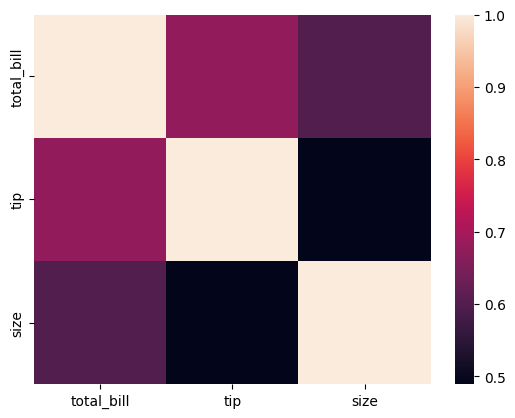

In [ ]:
cor=df.corr()
sns.heatmap(cor)

In [ ]:
fig=px.scatter(df,x="total_bill",y="tip", color="sex")
fig.show()

In [ ]:
fig=px.box(df,y="total_bill",x="sex",color="day")
fig.show()

In [ ]:
fig=px.box(df,y="tip",x="sex",color="day")
fig.show()

In [ ]:
fig=px.pie(df,values="tip",names="sex")
fig.show()

In [ ]:
fig=px.sunburst(df,path=["sex","day","time","smoker","size"],values="tip")
fig.show()

In [ ]:
fig=px.sunburst(df,path=["sex","day","time","smoker","size"],values="total_bill")
fig.show()

**Preprocessing**

In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
# Replacing the category value into numerical equivalents
df['sex']=df['sex'].map({'Female':0,'Male':1})
df['smoker']=df['smoker'].map({'No':11,'Yes':12})
df['day']=df['day'].map({'Thur':21,'Fri':21,'Sat':21,'Sun':21})
df["time"]=df["time"].map({"Dinner":4,'Lunch':5})


In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,11,21,4,2
1,10.34,1.66,1,11,21,4,3
2,21.01,3.50,1,11,21,4,3
3,23.68,3.31,1,11,21,4,2
4,24.59,3.61,0,11,21,4,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,11,21,4,3
240,27.18,2.00,0,12,21,4,2
241,22.67,2.00,1,12,21,4,2
242,17.82,1.75,1,11,21,4,2


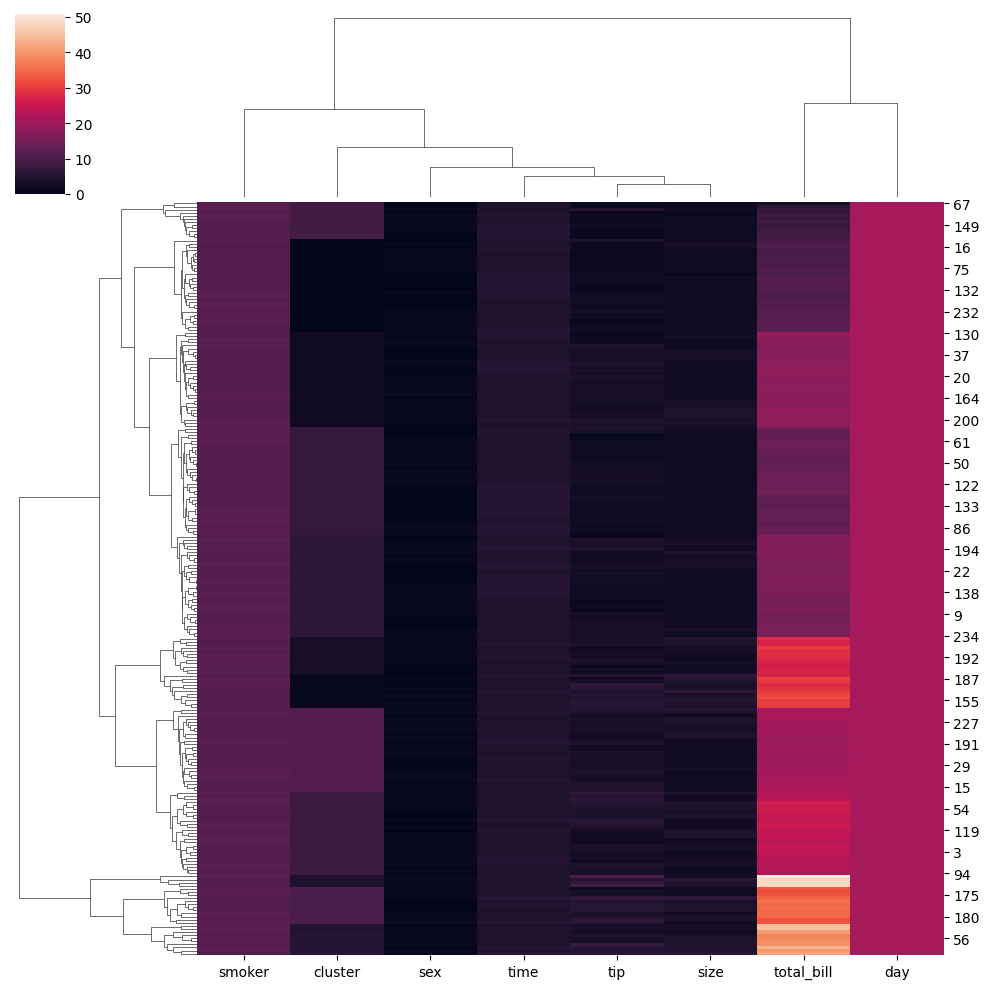

In [ ]:
sns.clustermap(df)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range (1,100):
  model=KMeans(i)
  model.fit(df)
  wcss.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
wcss

[20106.0741012295,
 7073.665145053478,
 3889.4030719070124,
 2434.805162267946,
 1763.2156690520123,
 1454.9163540367363,
 1214.583206934822,
 1022.9615287084116,
 944.3373915928188,
 842.9595337575308,
 775.5874604154105,
 727.1999337191241,
 681.42059129979,
 642.5021635834587,
 637.2373014125066,
 595.6653730277376,
 568.25268317678,
 549.5732178388646,
 531.0325654006201,
 506.6033680330871,
 486.18082839199417,
 483.01717008241735,
 466.3453791962482,
 452.4250246140408,
 430.0285254186272,
 420.3265165194805,
 423.5284663116821,
 401.04615502795446,
 405.758311836694,
 380.88818942580133,
 378.65167519391946,
 358.2340047539303,
 350.40779615537235,
 347.40221684801315,
 341.85732853418625,
 328.2741430647131,
 328.03763005422684,
 313.5651843541194,
 308.78136858960477,
 303.806592219031,
 299.89665090548334,
 286.8232400396826,
 281.95032510822506,
 278.37072278499284,
 271.9203409831835,
 264.0093099098125,
 263.70934252386496,
 257.23309079365083,
 246.73783546176048,
 244.71

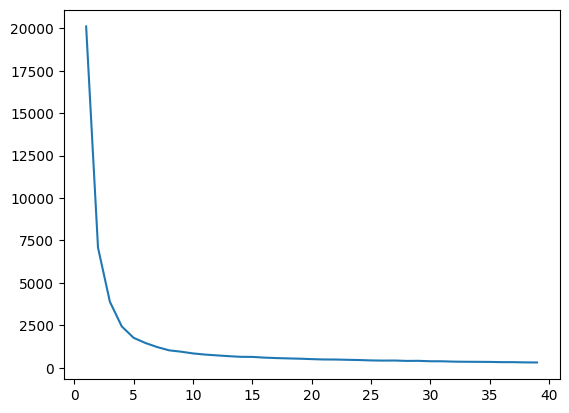

In [ ]:
plt.plot(range(1,40),wcss[:39])
plt.show()

In [ ]:
result=KMeans(12)
result.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=12)

In [ ]:
identify_cluster=result.fit_predict(df)
df["cluster"]=identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df.cluster.value_counts()

7     35
6     33
2     31
0     30
11    27
8     27
9     12
3     12
10    12
1     11
5      9
4      5
Name: cluster, dtype: int64

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,0,11,21,4,2,6
1,10.34,1.66,1,11,21,4,3,0
2,21.01,3.50,1,11,21,4,3,11
3,23.68,3.31,1,11,21,4,2,8
4,24.59,3.61,0,11,21,4,4,8
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,11,21,4,3,1
240,27.18,2.00,0,12,21,4,2,3
241,22.67,2.00,1,12,21,4,2,8
242,17.82,1.75,1,11,21,4,2,2


In [ ]:
df[df.cluster==4]

,total_bill,tip,sex,smoker,day,time,size,cluster
59,48.27,6.73,1,11,21,4,4,4
156,48.17,5.00,1,11,21,4,6,4
170,50.81,10.00,1,12,21,4,3,4
182,45.35,3.50,1,12,21,4,3,4
212,48.33,9.00,1,11,21,4,4,4


In [ ]:
df[df.cluster==5]

,total_bill,tip,sex,smoker,day,time,size,cluster
23,39.42,7.58,1,11,21,4,4,5
56,38.01,3.00,1,12,21,4,4,5
95,40.17,4.73,1,12,21,4,4,5
102,44.30,2.50,0,12,21,4,3,5
112,38.07,4.00,1,11,21,4,3,5
142,41.19,5.00,1,11,21,5,5,5
184,40.55,3.00,1,12,21,4,2,5
197,43.11,5.00,0,12,21,5,4,5
207,38.73,3.00,1,12,21,4,4,5


In [ ]:
df[df.cluster==1]

,total_bill,tip,sex,smoker,day,time,size,cluster
39,31.27,5.00,1,11,21,4,3,1
44,30.40,5.60,1,11,21,4,4,1
116,29.93,5.07,1,11,21,4,4,1
125,29.80,4.20,0,11,21,5,6,1
143,27.05,5.00,0,11,21,5,6,1
155,29.85,5.14,0,11,21,4,5,1
167,31.71,4.50,1,11,21,4,4,1
187,30.46,2.00,1,12,21,4,5,1
214,28.17,6.50,0,12,21,4,3,1
219,30.14,3.09,0,12,21,4,4,1


In [ ]:
pd.set_option ("display.max_rows",None)
df

,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,0,11,21,4,2,6
1,10.34,1.66,1,11,21,4,3,0
2,21.01,3.50,1,11,21,4,3,11
3,23.68,3.31,1,11,21,4,2,8
4,24.59,3.61,0,11,21,4,4,8
5,25.29,4.71,1,11,21,4,4,8
6,8.77,2.00,1,11,21,4,2,9
7,26.88,3.12,1,11,21,4,4,3
8,15.04,1.96,1,11,21,4,2,6
9,14.78,3.23,1,11,21,4,2,6
